In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, copy, warnings


from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import xgboost as xgb



from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, auc


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score,f1_score

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


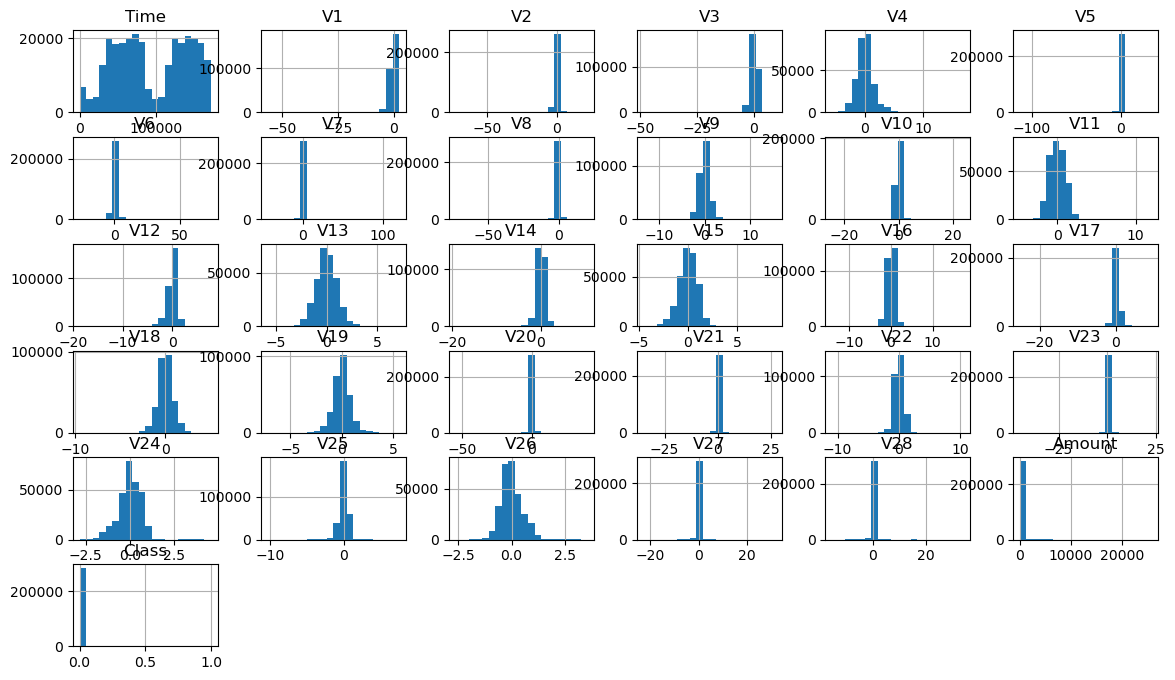

In [5]:
data=pd.read_csv("creditcard.csv")
histogram = data.hist(bins=20)
data.head()

In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [12]:
classes = data['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
normal_share = round((classes[0]/data['Class'].count()*100),2)
normal_share

99.83

In [14]:
fraud_share = round((classes[1]/data['Class'].count()*100),2)
fraud_share

0.17

In [ ]:
We can see that there is only 0.17% frauds. 

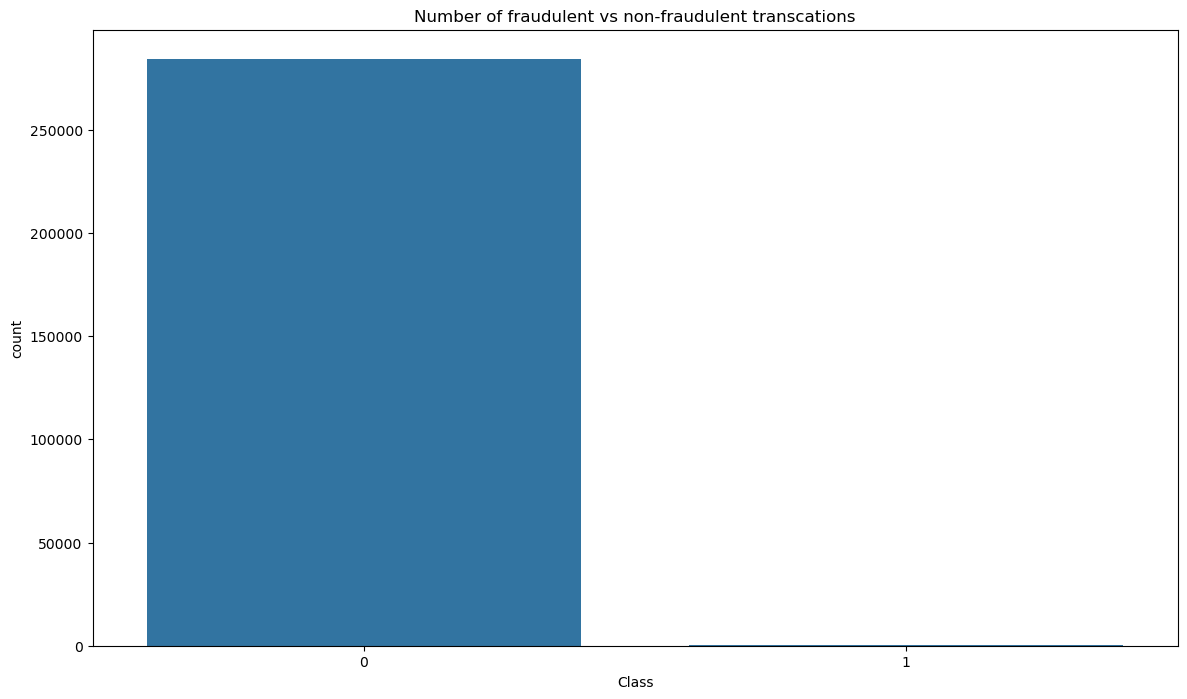

In [15]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

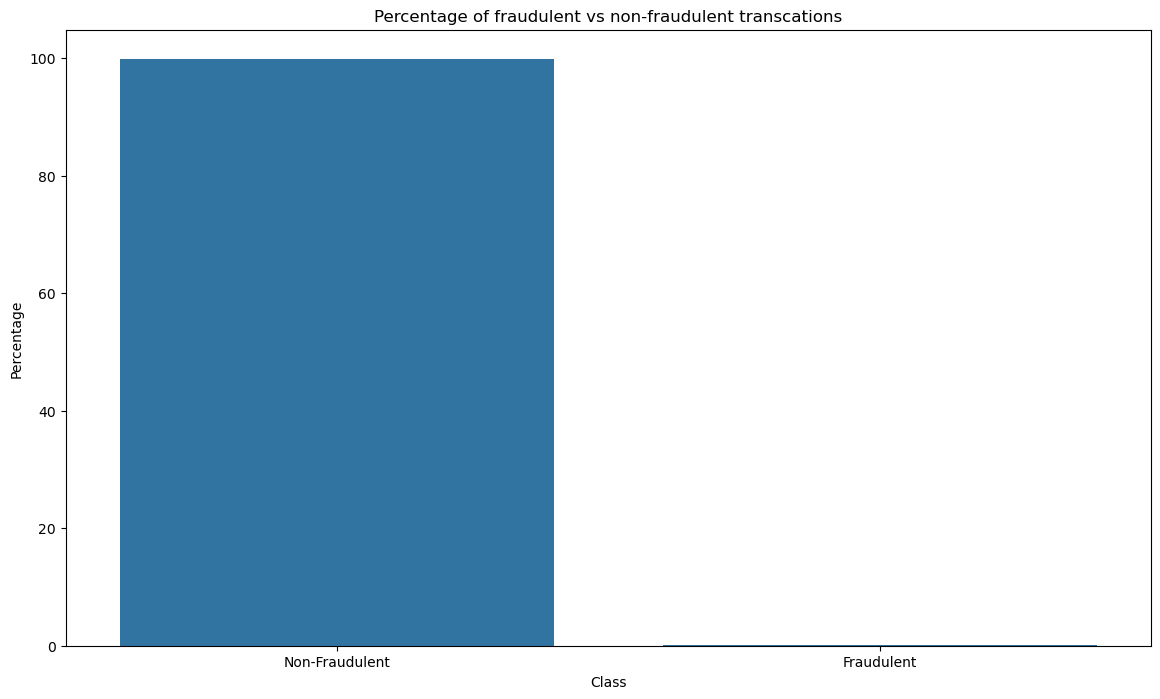

In [16]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
data_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=data_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

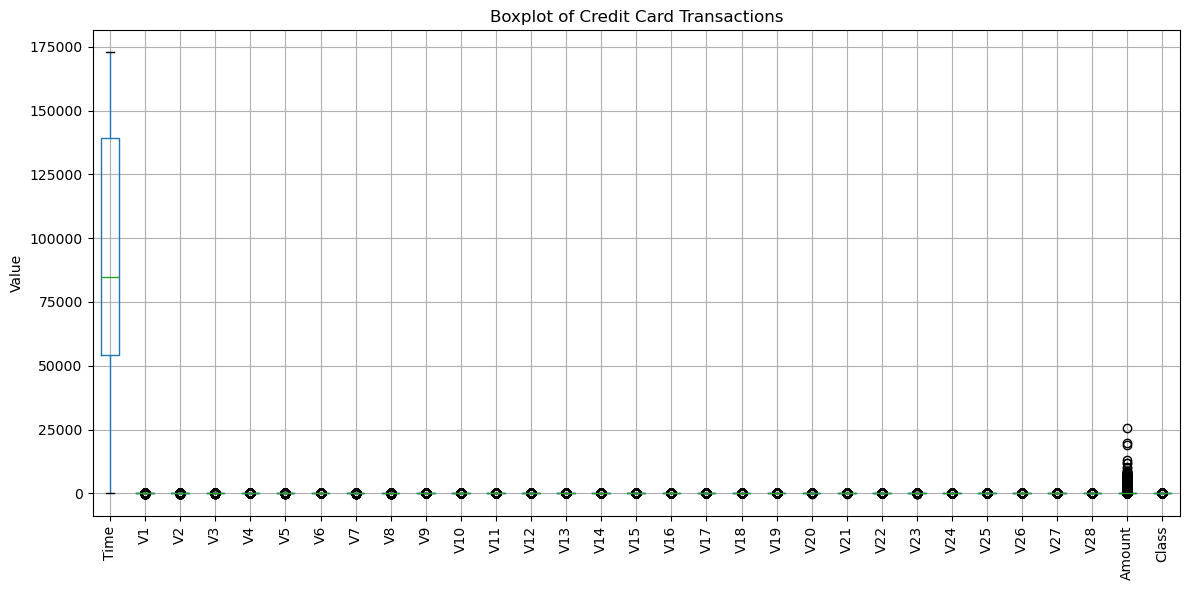

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [17]:
plt.figure(figsize=(12, 6))
data.boxplot()
plt.title('Boxplot of Credit Card Transactions')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(data)


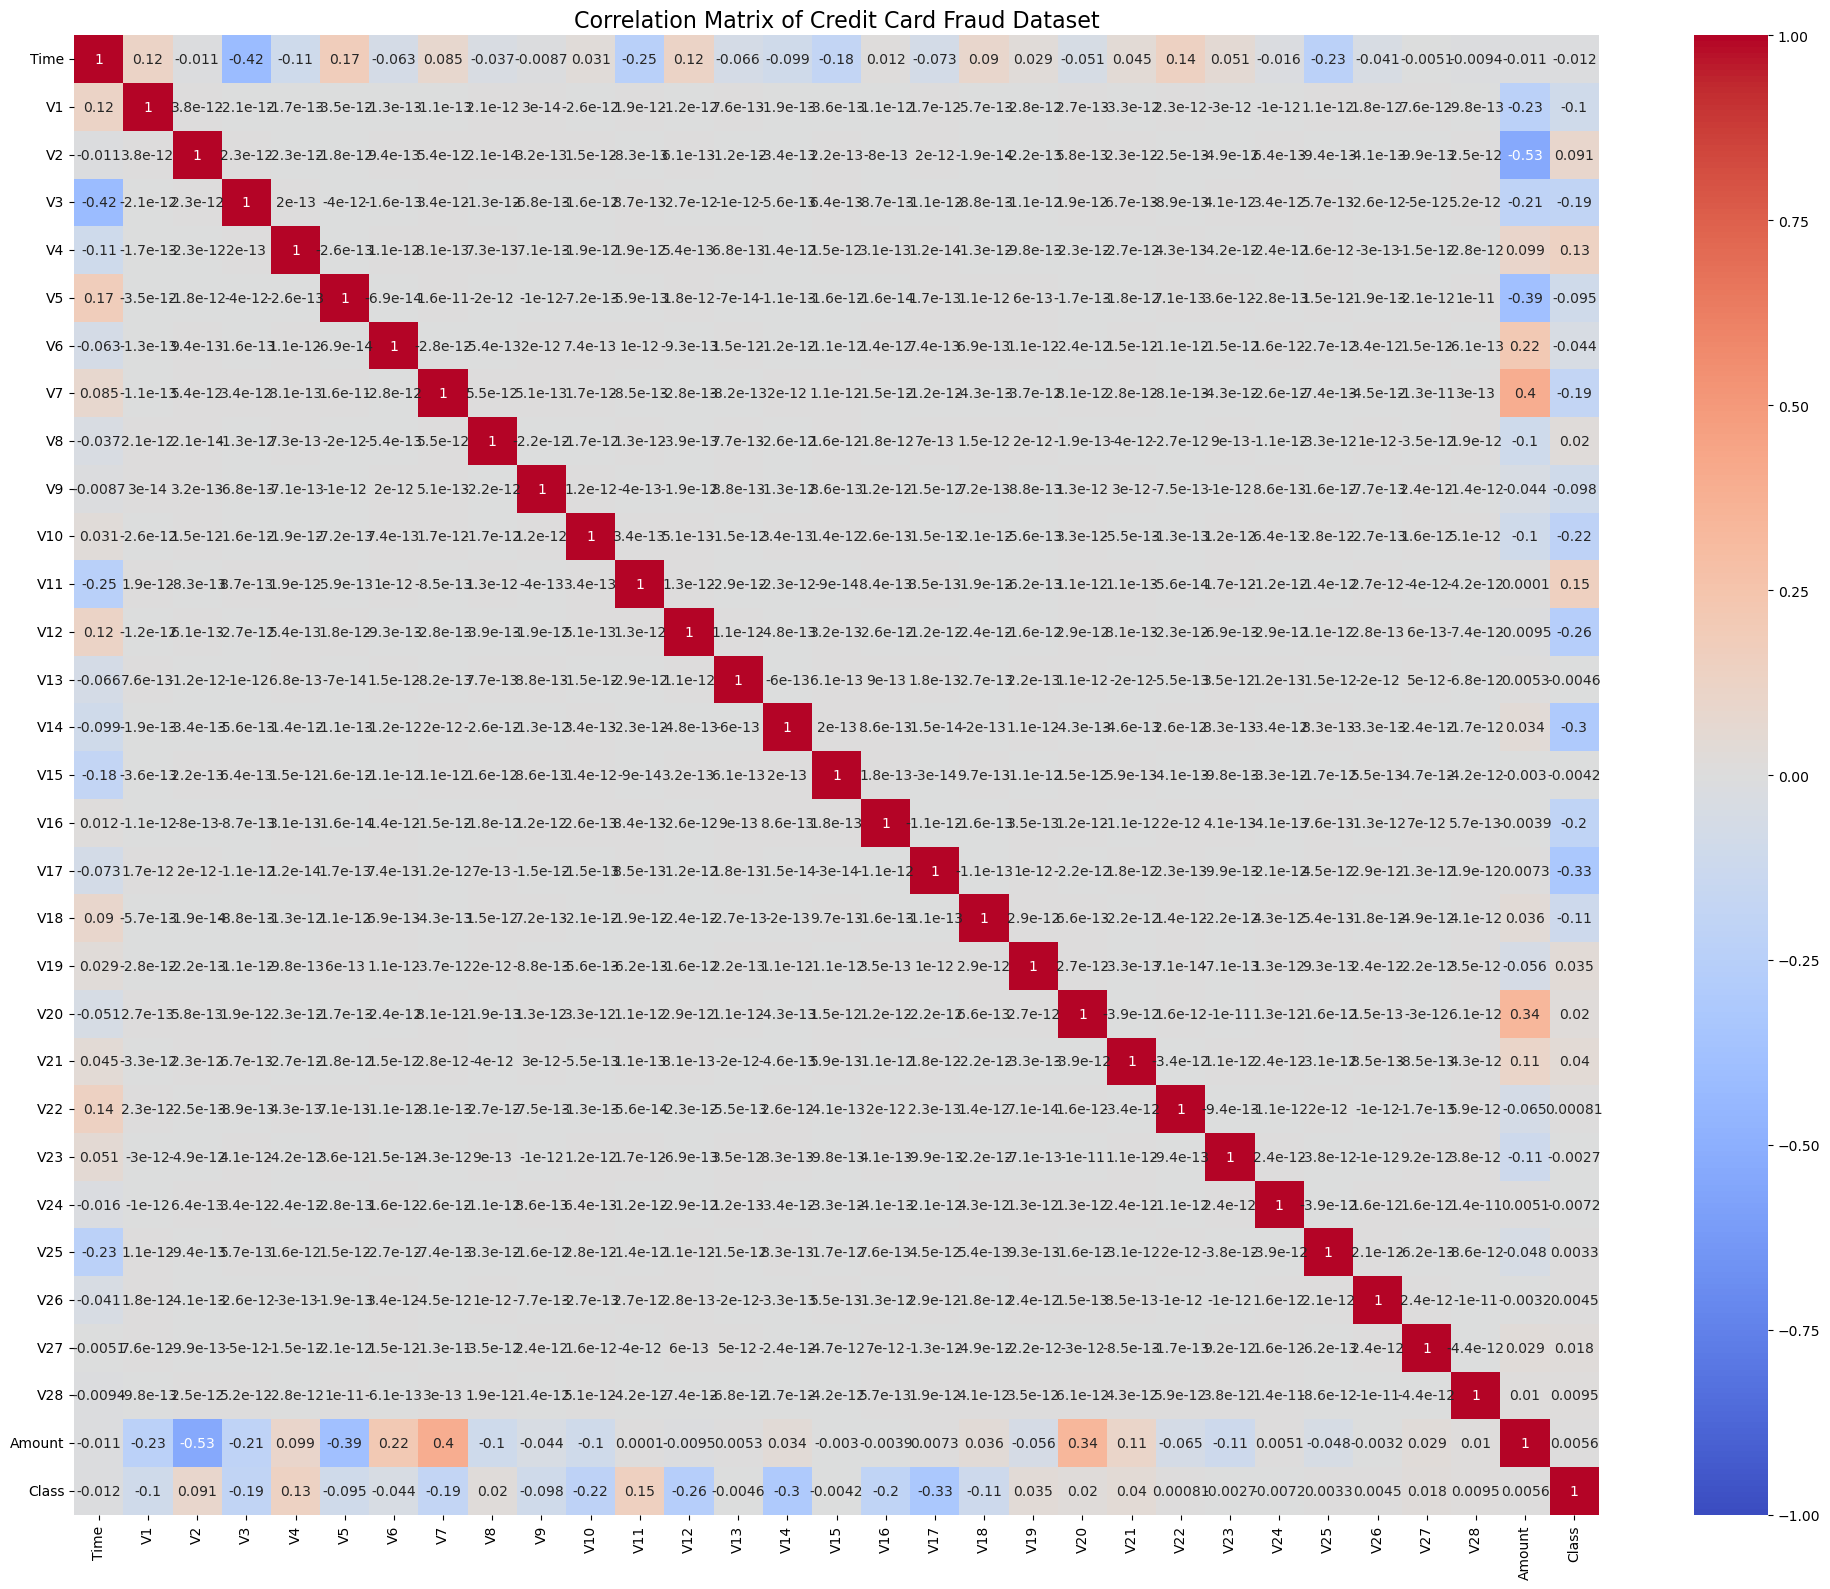

In [75]:
corr_matrix=data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Credit Card Fraud Dataset', fontsize=16)
plt.tight_layout()
plt.show()


Outliers treatment
We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.



Observe the distribution of classes with time

In [18]:
# Creating fraudulent dataframe
data_fraud = data[data['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = data[data['Class'] == 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_9776\1625276516.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_fraud['Time'], label='Fraudulent', shade=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9776\1625276516.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_non_fraud['Time'], label='Non-Fraudulent', shade=False)


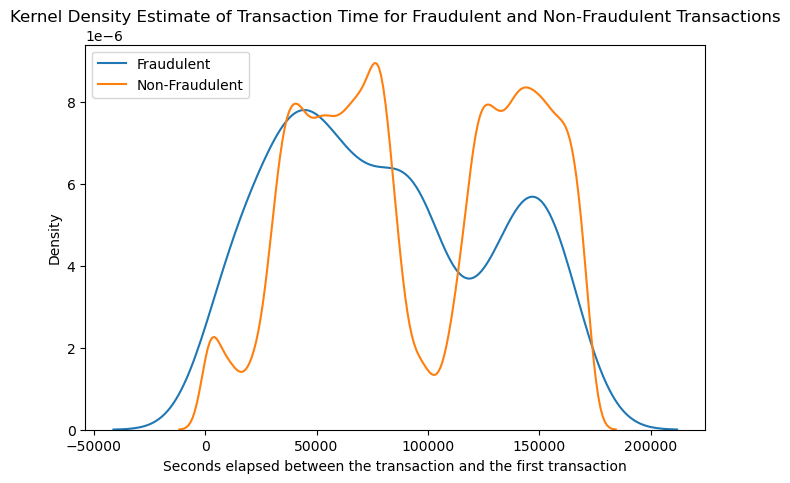

In [19]:
plt.figure(figsize=(8, 5))

# Use kdeplot for kernel density estimation instead of distplot
sns.kdeplot(data_fraud['Time'], label='Fraudulent', shade=False)
sns.kdeplot(data_non_fraud['Time'], label='Non-Fraudulent', shade=False)

# Set axis labels
plt.xlabel('Seconds elapsed between the transaction and the first transaction')
plt.title('Kernel Density Estimate of Transaction Time for Fraudulent and Non-Fraudulent Transactions')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [20]:
normal = data[data.Class==0] # Set of all normal (y = 0) cases
fraud = data[data.Class==1]  # Set of all fraud (y = 1) cases


num_normal = normal.shape[0] 
num_fraud = fraud.shape[0] 

print(f"Number of normal examples = {num_normal}")
print(f"Number of fraud examples = {num_fraud}\n")


ratio = num_normal/num_fraud
print(f'normal to fraud ratio in the whole data = {round(ratio,2)}')

Number of normal examples = 284315
Number of fraud examples = 492

normal to fraud ratio in the whole data = 577.88


C:\Users\Admin\AppData\Local\Temp\ipykernel_27024\1782309872.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_27024\1782309872.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns

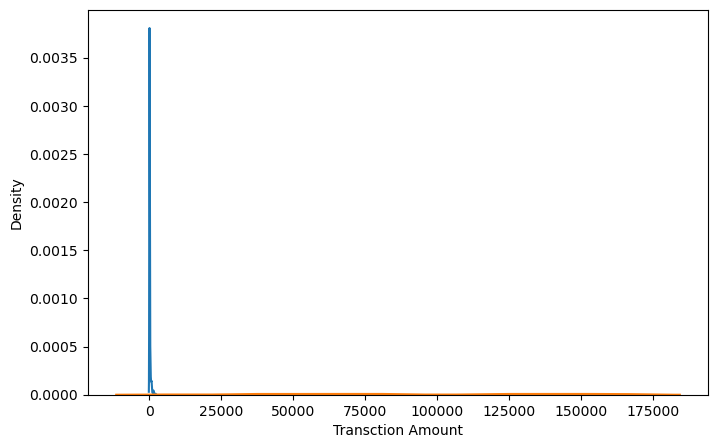

In [81]:
#Observe the distribution of classes with amount
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()


In [23]:
#Train Test split
# Putting feature variables into X
X = data.drop(['Class'], axis=1)
# Putting target variable to y
y = data['Class']
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

Feature Scaling
We need to scale only the Amount column as all other columns are already scaled by the PCA transformation
.

In [27]:
# Instantiate the Scaler
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,134039.0,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,124044.0,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,54997.0,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,137226.0,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,136246.0,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [28]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


Decision tree  
Handles Imbalance data


In [29]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

Prediction and Evaluation

In [30]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.74      0.72        96

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [32]:
print(confusion_matrix(y_test,predictions))

[[56837    29]
 [   25    71]]


DECISON TREE CLASSIFIER FOR MODEL IMBALANCE

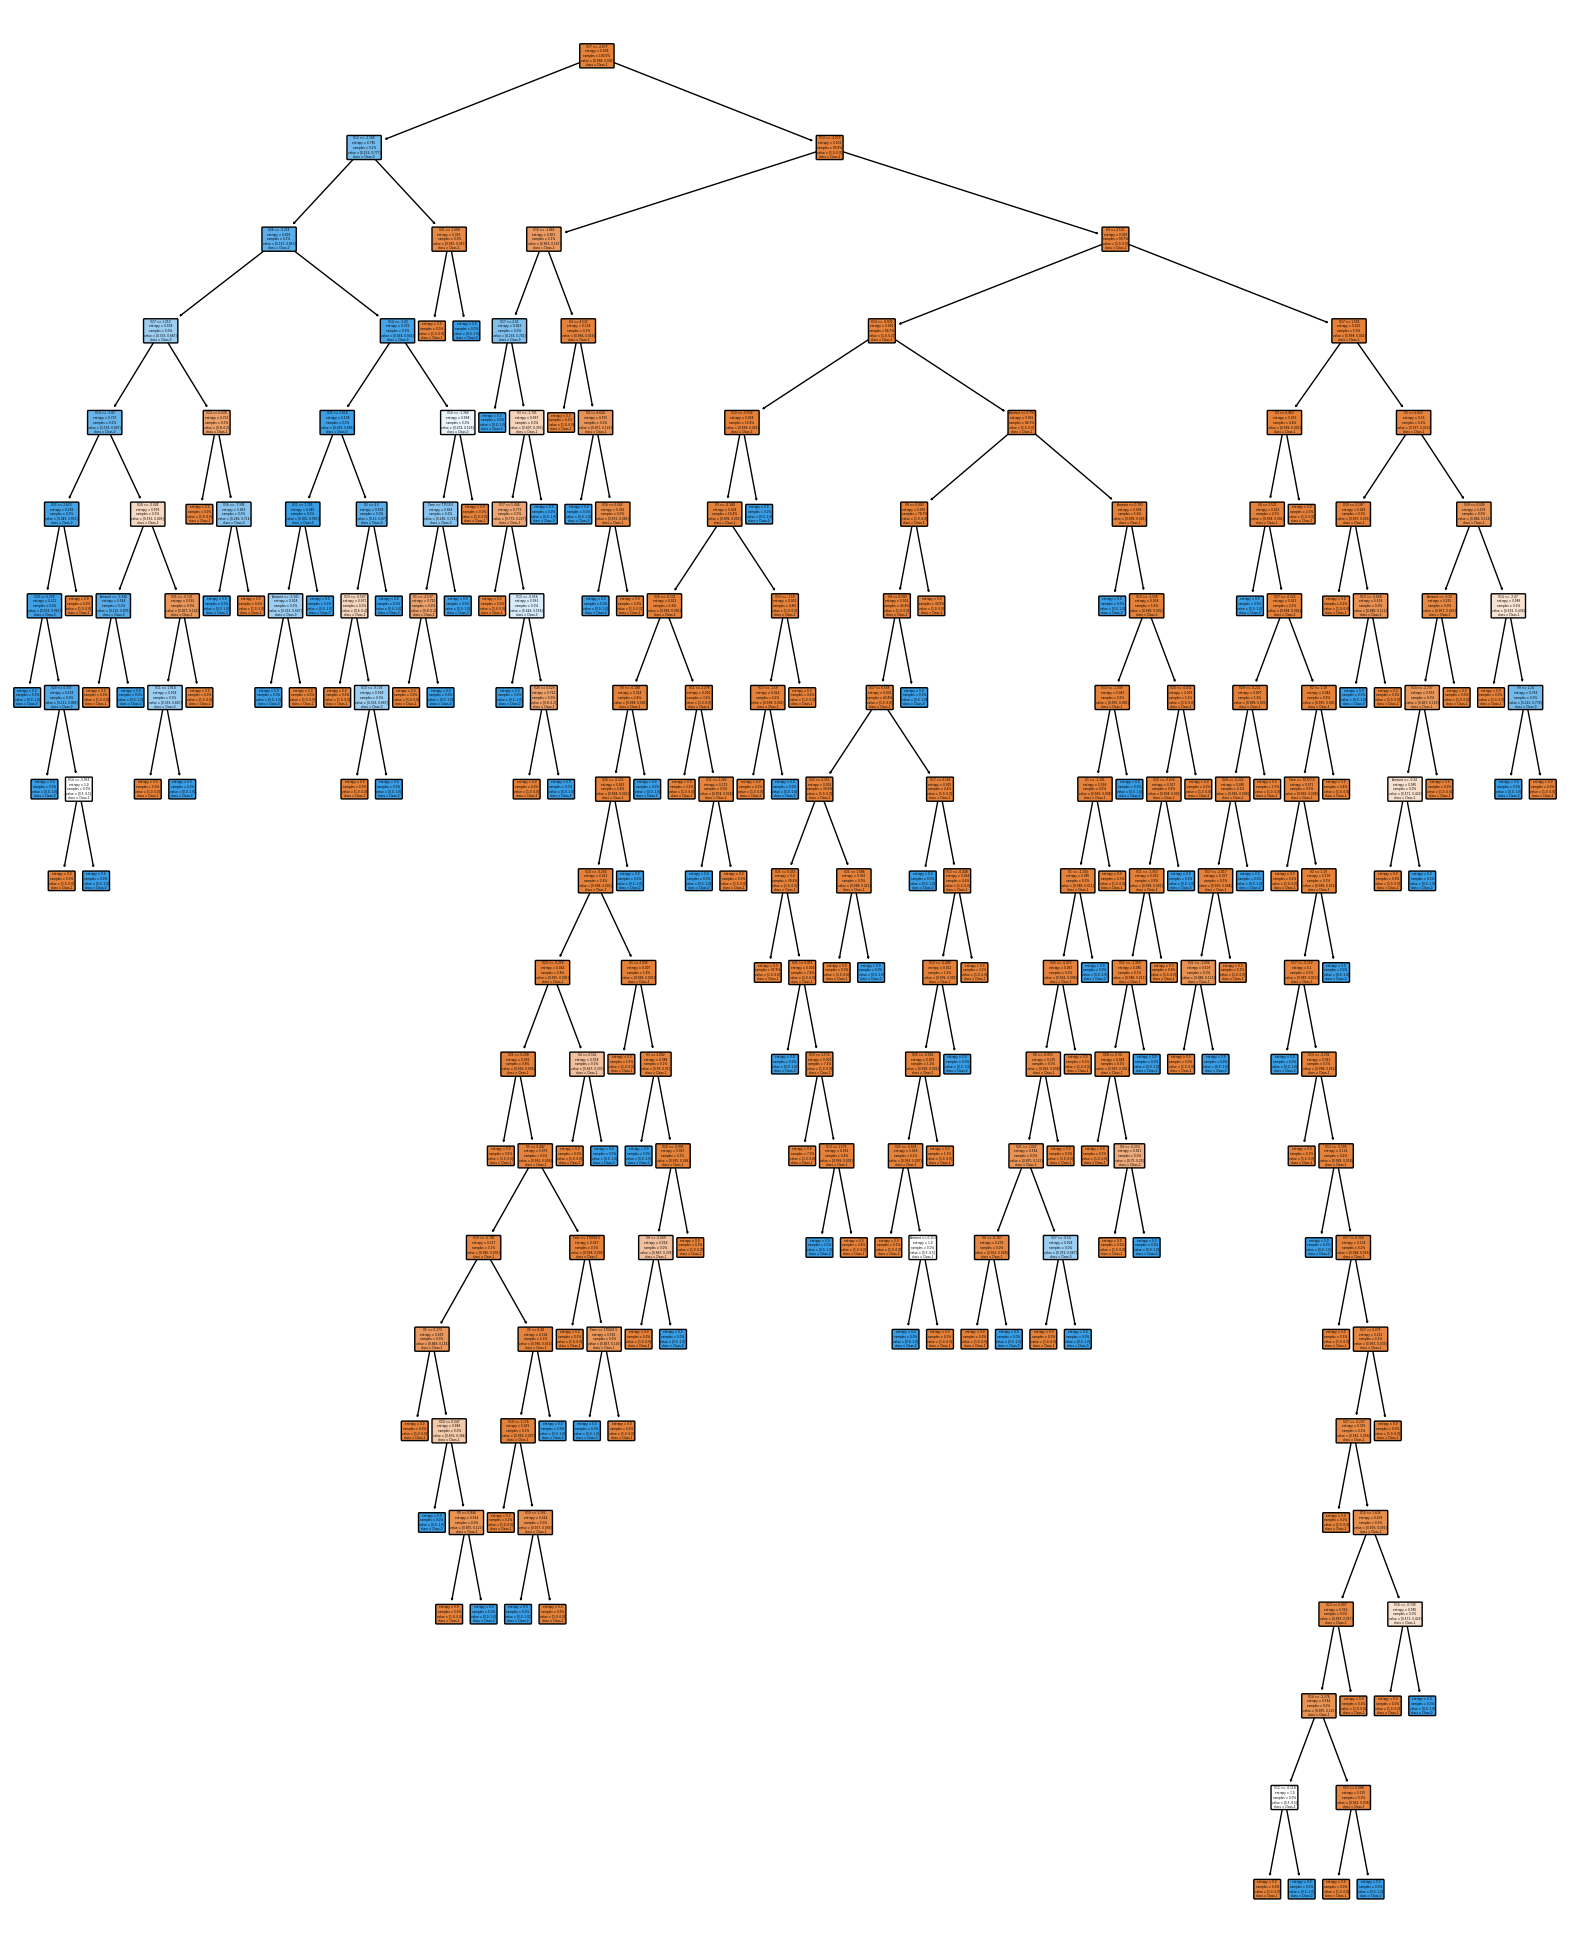

In [33]:

plt.figure(figsize=(20,25))
tree.plot_tree(dtree,feature_names=X.columns,class_names=['Class-1', 'Class-0'],rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True
        )
plt.show()

ROC on train set of Decision tree classifier

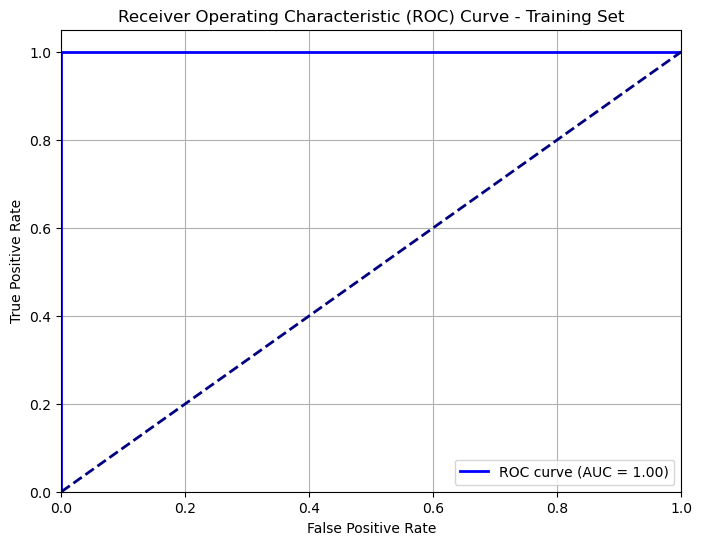

In [44]:
#  Predict the probabilities for the training set
y_train_pred_proba = decision_tree_model.predict_proba(X_train)[:, 1]  # Probability of the positive class (fraudulent)

# Function to plot the ROC curve for the training set (same as for the test set)
def draw_roc_train(y_true, y_pred_proba, dataset_type="Test"):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (no-skill classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {dataset_type} Set')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

#  Plot the ROC curve for the training se
draw_roc_train(y_train, y_train_pred_proba, dataset_type="Training")


We can see that we have very good ROC on the test to  1

ROC on the test set of Decision tree Classifier

In [40]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

#  Predict the probabilities for the test set
y_test_pred_proba = decision_tree_model.predict_proba(X_test)[:, 1]

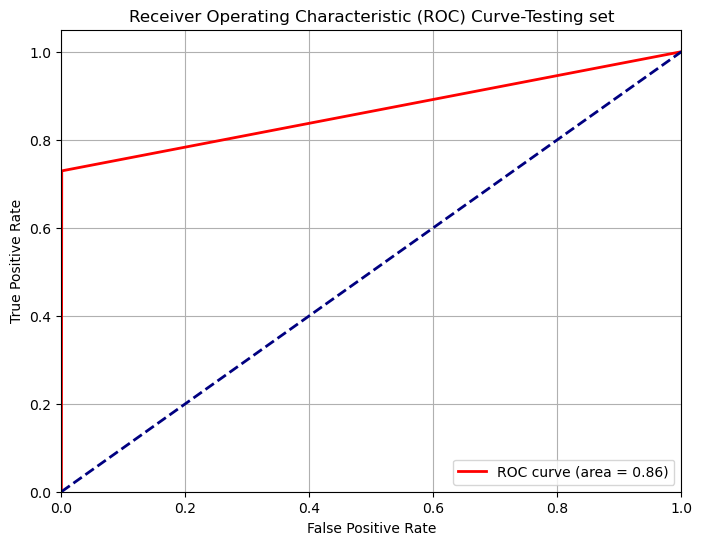

In [102]:
def draw_roc(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (no-skill classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve-Testing set')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Step 4: Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We acheived very good ROC 0.86 on the test set

In [48]:
# Prediction on the test set
y_test_pred = decision_tree_model.predict(X_test)

# Confusion matrix for the test set
confusion_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(confusion_test)

TP_test = confusion_test[1, 1]  # True Positives
TN_test = confusion_test[0, 0]  # True Negatives
FP_test = confusion_test[0, 1]  # False Positives
FN_test = confusion_test[1, 0]  # False Negatives

# Accuracy for test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

# Sensitivity (Recall) for test set
print("Test Sensitivity (Recall):", TP_test / float(TP_test + FN_test))

# Specificity for test set
print("Test Specificity:", TN_test / float(TN_test + FP_test))

# F1 Score for test set
print("Test F1-Score:", f1_score(y_test, y_test_pred))

# Classification report for test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Confusion Matrix (Test Set):
[[56835    31]
 [   26    70]]
Test Accuracy: 0.9989993328885924
Test Sensitivity (Recall): 0.7291666666666666
Test Specificity: 0.9994548587908416
Test F1-Score: 0.7106598984771574

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.73      0.71        96

    accuracy                           1.00     56962
   macro avg       0.85      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
# Prediction on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Confusion matrix for the training set
confusion_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Set):")
print(confusion_train)

TP_train = confusion_train[1, 1]  # True Positives
TN_train = confusion_train[0, 0]  # True Negatives
FP_train = confusion_train[0, 1]  # False Positives
FN_train = confusion_train[1, 0]  # False Negatives

# Accuracy for training set
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

# Sensitivity (Recall) for training set
print("Train Sensitivity (Recall):", TP_train / float(TP_train + FN_train))

# Specificity for training set
print("Train Specificity:", TN_train / float(TN_train + FP_train))

# F1 Score for training set
print("Train F1-Score:", f1_score(y_train, y_train_pred))

# Classification report for training set
print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))



Confusion Matrix (Training Set):
[[227449      0]
 [     0    396]]
Train Accuracy: 1.0
Train Sensitivity (Recall): 1.0
Train Specificity: 1.0
Train F1-Score: 1.0

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Model Summary
    Training Set:
    Accuracy: 1.0
    Sensitivity (Recall): 1.0
    Specificity: 1.0
    F1-Score: 1.0
    ROC-AUC: 1.0
Test Set:
    Accuracy: 0.99
    Sensitivity (Recall): 0.72
    Specificity: 0.99
    F1-Score: 0.71
    ROC-AUC: 0.97

In [140]:
Fraud = data[data['Class']==1]

Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


SUPPORT VECTOR MACHINE
Model Prediction
Now it is time to start building the model .The types of algorithms we are going to use to try to do anomaly detection on this dataset are as follows

XGboost

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:07:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.74      0.82        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Test Set):
[[56859     7]
 [   25    71]]
Test Accuracy: 0.9994382219725431
Test F1-Score: 0.8160919540229885


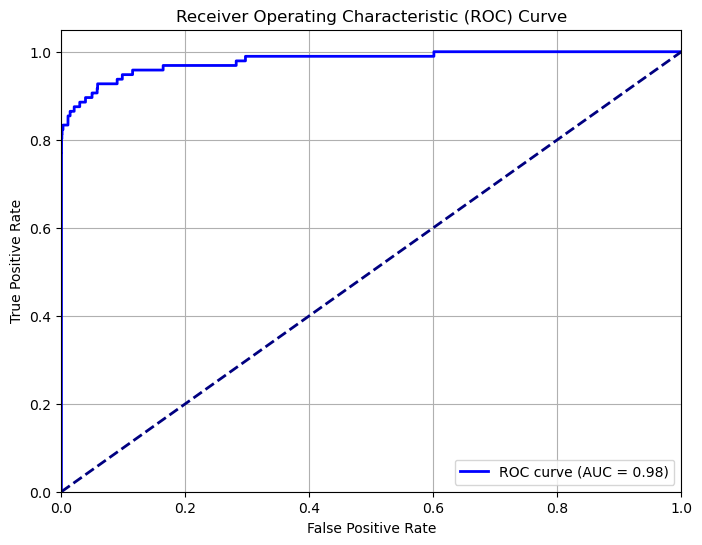

In [60]:


# Scaling the Amount feature
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

# XGBoost model training
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

confusion_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Set):")
print(confusion_test)

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# F1 Score
print("Test F1-Score:", f1_score(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Choosing best model on the balanced data. With every data balancing thechnique we built several models such as, XGBoost, Decision Tre.

We can see that almost all the models performed more or less good. But we should be interested in the best modelThe best model is XGBoost based on the complex dataset and its performance.classical machine learning algorithms are trying to solve complex dataset in that case XGBoost performs well..

Future Work
There are many ways to improve the model, such as using it on different datasets with various sizes and data types or by changing the data splitting ratio and viewing it from a different algorithm perspective. An example can be merging telecom datato calculate the location of people to have better knowledge of the location of the card owner while his/her credit card is being used; this will ease the detection because if the card owner is in Dubai and a transaction of his card was made in Abu Dhabi, it will easily be detected as Fraud.
Conclusion
In conclusion, the main objective of this project was to find the most suited model for creditcard fraud detection in terms of the machine learning techniques chosen for the project. It was met by building the two models and finding the accuracies of them all; the best in terms of accuracy is Decision Tree, which scored 100 on credit card fraud and increased the customer’s satisfaction as it will provide themwith a better experience and feeling secure.


irement.